In [1]:
# Loading the YOLO

from ultralytics import YOLO

In [2]:
# Briefly displaying architecture

model = YOLO("yolov8n.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [3]:
# Training the model for 100 epochs, training is halted at nearly 70th epoch

model.train(data="data/data.yaml", epochs=100, batch=8)

Ultralytics YOLOv8.0.145  Python-3.7.16 torch-1.13.1+cpu CPU (Intel Core(TM) i5-8350U 1.70GHz)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=data/data.yaml, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

No module named 'seaborn._core.typing'


      1/100         0G      3.262      4.418      4.214         29        640: 100%|██████████| 110/110 [12:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:43
                   all        250        454    0.00216       0.46    0.00282    0.00107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/100         0G      3.267      4.209      3.958         20        640: 100%|██████████| 110/110 [06:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:49
                   all        250        454     0.0176     0.0571    0.00947     0.0031

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/100         0G      3.034      4.143      3.624         25        640: 100%|██████████| 110/110 [06:28<00:00,  
                 Class     Images  Instances      Box(P         

PermissionError: [Errno 13] Permission denied: 'runs\\detect\\train\\results.csv'

In [ ]:
# Running inference on a given video

import os
import cv2
video_path = "1900-151662242_small.mp4"
cap = cv2.VideoCapture("1900-151662242_small.mp4")

ret, frame = cap.read()
H, W, _ = frame.shape
video_path_out = '{}_out.mp4'.format(video_path)
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'best.pt')
model = YOLO(model_path)

threshold = 0.2
while ret:
    results = model(frame)[0]
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 8)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 255), 2, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

In [4]:
# Impoting libraries for reading and visualizing metrics data

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Reading the metrics metadata

df = pd.read_csv("runs/detect/train/results.csv")
df

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,3.2620,4.4184,4.2135,0.00216,0.45999,0.00282,0.00107,2.8838,4.5022,4.0978,0.000367,0.000367,0.000367
1,1,3.2673,4.2092,3.9579,0.01762,0.05711,0.00947,0.00310,2.7684,29.7660,4.9285,0.000730,0.000730,0.000730
2,2,3.0336,4.1428,3.6240,0.00272,0.45760,0.00407,0.00116,2.6784,5.0603,3.6531,0.001086,0.001086,0.001086
3,3,2.8451,4.1181,3.4311,0.00299,0.52009,0.00845,0.00288,2.9887,8.4935,3.8802,0.001078,0.001078,0.001078
4,4,2.7509,4.0294,3.2744,0.80507,0.01849,0.02254,0.00778,2.8130,4.7576,3.4164,0.001078,0.001078,0.001078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,1.2925,1.9220,1.8113,0.45533,0.43034,0.40563,0.26554,1.4670,2.2308,2.0962,0.000374,0.000374,0.000374
69,69,1.3069,1.9002,1.8119,0.42794,0.44131,0.42206,0.29523,1.4669,2.1240,2.0771,0.000363,0.000363,0.000363
70,70,1.2829,1.9021,1.7810,0.40568,0.45809,0.43146,0.28117,1.4662,2.1505,2.0837,0.000352,0.000352,0.000352
71,71,1.3021,1.9255,1.8067,0.51012,0.39982,0.42385,0.29537,1.4704,2.1143,2.0820,0.000341,0.000341,0.000341


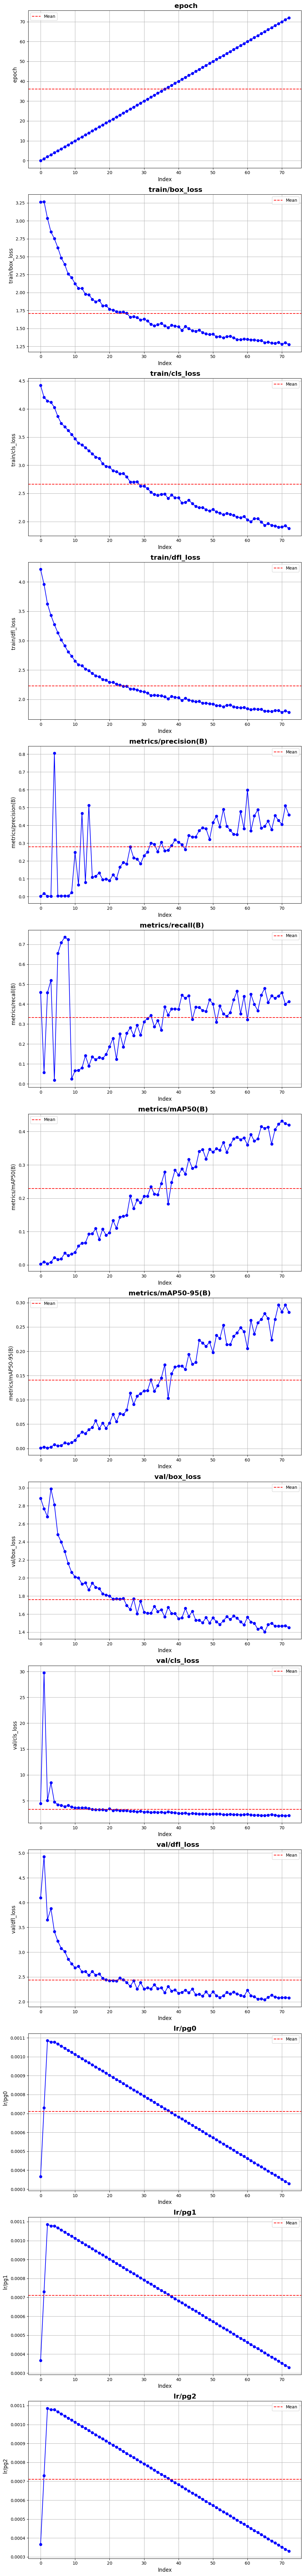

In [28]:
# Visualizing metrics

%matplotlib inline
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 6 * len(df.columns)))
for i, col in enumerate(df.columns):
    axes[i].plot(df[col], marker='o', linestyle='-', color='b')
    axes[i].set_title(f'{col}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Index', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].grid(True)
    
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].axhline(y=df[col].mean(), color='r', linestyle='--', label='Mean')
    axes[i].legend(loc='best')

plt.tight_layout()
plt.show()